In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# ETL (load CSV pandas dataframe and summary)
file_path = './dataframes/dataframe.csv'

# load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.tail(300)
print(df)

                        time_stamp  electric_demand  temp_value  \
633  Wed, 15 May 2024 07:33:01 GMT         153.3322     15.4222   
634  Wed, 15 May 2024 07:34:01 GMT         153.1042     15.4328   
635  Wed, 15 May 2024 07:35:01 GMT         152.8762     15.4435   
636  Wed, 15 May 2024 07:36:02 GMT         152.6444     15.4544   
637  Wed, 15 May 2024 07:37:02 GMT         152.4164     15.4650   
..                             ...              ...         ...   
928  Wed, 15 May 2024 12:28:48 GMT         142.3296     20.8700   
929  Wed, 15 May 2024 12:29:48 GMT         142.1216     20.8700   
930  Wed, 15 May 2024 12:30:49 GMT         141.9101     20.8918   
931  Wed, 15 May 2024 12:31:49 GMT         141.7021     20.9184   
932  Wed, 15 May 2024 12:32:49 GMT         141.4941     20.9451   

     humidity_value  dewpoint_value  
633         63.9004          8.2338  
634         63.9237          8.2218  
635         63.9471          8.2098  
636         63.9708          8.1976  
637  

In [3]:
ts_data = df['electric_demand']
print(ts_data)

633    153.3322
634    153.1042
635    152.8762
636    152.6444
637    152.4164
         ...   
928    142.3296
929    142.1216
930    141.9101
931    141.7021
932    141.4941
Name: electric_demand, Length: 300, dtype: float64


In [4]:
# fit an ARIMA model
model = sm.tsa.arima.ARIMA(ts_data, order=(1,1,1))
results = model.fit()

In [5]:
# print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        electric_demand   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 426.479
Date:                Wed, 15 May 2024   AIC                           -846.958
Time:                        09:23:59   BIC                           -835.857
Sample:                             0   HQIC                          -842.515
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9647      0.021     46.019      0.000       0.924       1.006
ma.L1          0.2060      0.033      6.248      0.000       0.141       0.271
sigma2         0.0033    6.8e-05     49.175      0.0

In [6]:
# forecast future points
forecast = results.get_forecast(steps=30)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

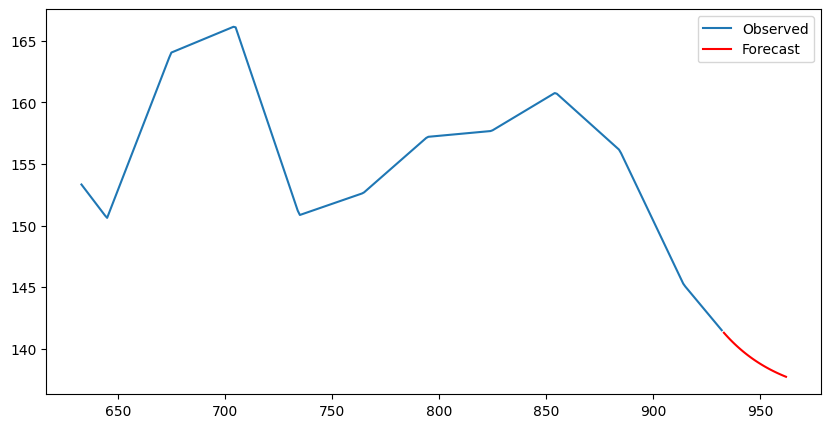

In [7]:
# plot results
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data, label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')
#plt.fill_between(mean_forecast.index, confidence_intervals[:,0], confidence_intervals[:,1], color='pink')
plt.legend()
plt.show()